# User Profiles
<br>
<br>
We will create three different types of user profiles:<br>
 - daily user profile <br>
 - weekly user profile <br>
 - and monthly user profile <br>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from helper_functions import cm_to_inch 

In [9]:
FILE_NUMBER = 0
USER = 'TP_5. prekomorske brigade_PLC_11135564_A+_2701'

In [4]:
plt.style.use(['seaborn'])
plt.rcParams["font.family"] = "Times new roman"
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [5]:
users = pd.read_excel('usable_users.xlsx', parse_date=['Time'], index_col='Time')

## Weekly user profile

In [13]:
# TODO: find a better way to resolve the issue of duplicating week 1 due to datetime
# We will allow ourselfs a little bit of a cheating here to delete some excessive data
weekly_user_cleaned_data = users.iloc[7 * 24 : -7 * 24, :]

users_sorted_by_week = weekly_user_cleaned_data.groupby(weekly_user_cleaned_data.index.week)

weekly_energy_usage = dict()
# beacuse we removed the first week from our data set we have to add it manually
week = 1
for dummy_week, energy in tqdm(users_sorted_by_week):
    weekly_energy_usage[week] = dict()
    for user in energy:
        weekly_energy_usage[week][user] = np.array(energy[user].values)
        if max(weekly_energy_usage[week][user]):
            weekly_energy_usage[week][user] = weekly_energy_usage[week][user] / max(weekly_energy_usage[week][user])
        else:
            # handling of division by zero
            weekly_energy_usage[week][user] = np.zeros([24 * 7], float)
    week += 1
    
weekly_energy_usage = pd.DataFrame.from_dict(weekly_energy_usage)
weekly_energy_usage = weekly_energy_usage.T

weekly_user_profiles = dict()
for user in tqdm(weekly_energy_usage):
    weekly_user_profiles[user] = np.zeros([7 * 24 + 1], float)
    for week in weekly_energy_usage.index:
        for hour in range(len(weekly_energy_usage[user][week])):
            weekly_user_profiles[user][hour] += weekly_energy_usage[user][week][hour] / len(weekly_energy_usage)

weekly_user_profiles = pd.DataFrame.from_dict(weekly_user_profiles)

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:08<00:00,  6.02it/s]
2529it [05:44,  7.34it/s]                                                                                              


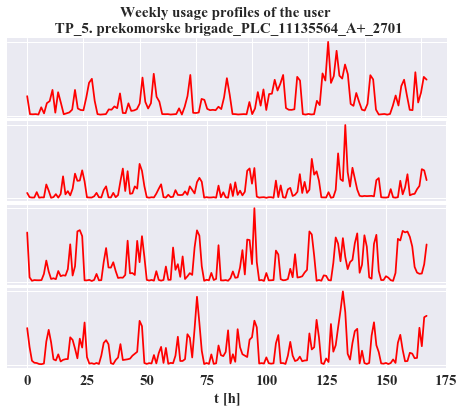

In [10]:
fig, axs = plt.subplots(4, 1, figsize = (cm_to_inch(20), cm_to_inch(15.4)))
fig.subplots_adjust(hspace = cm_to_inch(0.1))
axs[0].set_title('Weekly usage profiles of the user \n {}'.format(USER), fontsize=15)
for i in range(0, 4):
    axs[i].plot(weekly_energy_usage[USER][i+1], c = 'r')
    axs[i].grid(True)
    axs[i].yaxis.set_ticklabels([])
    if i < 3:
        axs[i].xaxis.set_ticklabels([])
    else :
        axs[i].set_xlabel('t [h]', fontsize = 15)

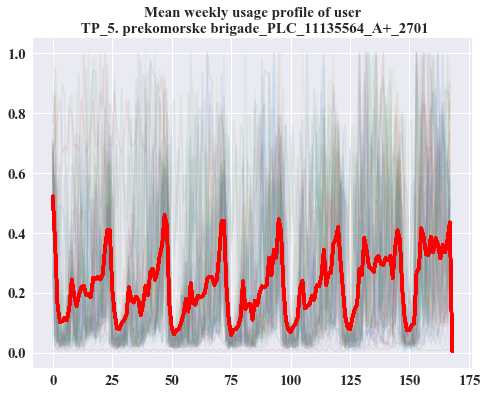

In [11]:
plt.figure(figsize = (cm_to_inch(20), cm_to_inch(15.4)))
plt.title('Mean weekly usage profile of user\n {}'.format(USER), fontsize=15)
for week in weekly_energy_usage.index:
    plt.plot(weekly_energy_usage[USER][week], alpha = 0.1)
    plt.plot(weekly_user_profiles[USER], c = 'r', lw = 3)

In [61]:
weekly_user_profiles.to_excel('weekly_user_profiles.xlsx')

## Daily user profile

In [14]:
users_sorted_by_hour = users.groupby(users.index.hour)
daily_user_profiles = {}
for time, energy in tqdm(users_sorted_by_hour):
    daily_user_profiles[time] = {}
    for user in energy:
        daily_user_profiles[time][user] = np.array(energy[user].values)
        if max(daily_user_profiles[time][user]):
            daily_user_profiles[time][user] = daily_user_profiles[time][user] / max(daily_user_profiles[time][user])
            daily_user_profiles[time][user] = daily_user_profiles[time][user].mean()
        else:
            print('Zero Division Error!')

daily_user_profiles = pd.DataFrame.from_dict(daily_user_profiles)
daily_user_profiles = daily_user_profiles.T

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.29it/s]


Text(0.5, 0, 't [h]')

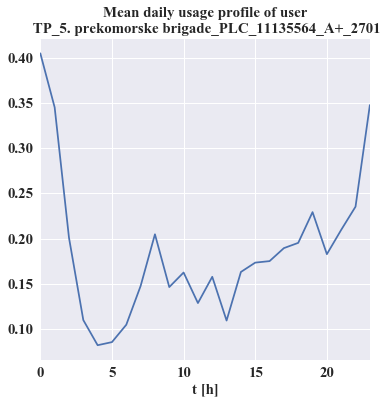

In [20]:
plt.figure(figsize = (cm_to_inch(15), cm_to_inch(15)))
plt.title('Mean daily usage profile of user\n {}'.format(USER), fontsize=15)
daily_user_profiles[USER].plot()
plt.xlabel('t [h]', fontsize = 15)

In [17]:
daily_user_profiles.to_excel('daily_user_profiles.xlsx')

## Monthly user profiles

In [18]:
users_sorted_by_month = users.groupby(users.index.month)

monthly_user_profiles = {}
for month, energy in users_sorted_by_month:
    monthly_user_profiles[month] = {}
    for user in energy:
        monthly_user_profiles[month][user] = np.array(energy[user].values)
        if max(monthly_user_profiles[month][user]):
            monthly_user_profiles[month][user] = monthly_user_profiles[month][user] / max(monthly_user_profiles[month][user])
            monthly_user_profiles[month][user] = monthly_user_profiles[month][user].mean()
        else:
            print('Division by 0 at {} month, of user {}'.format(month, user))
            monthly_user_profiles[month][user] = monthly_user_profiles[month][user].mean()
            
monthly_user_profiles = pd.DataFrame.from_dict(monthly_user_profiles)
monthly_user_profiles = monthly_user_profiles.T

Division by 0 at 1 month, of user TP_Zalec Soseska 5_159113841920_A+_24501
Division by 0 at 1 month, of user TP_Zalec Soseska 5_159113841951_A+_24801
Division by 0 at 1 month, of user TP_Copova Zalec_159113841921_A+_22001
Division by 0 at 1 month, of user TP_Cukovec_PLC_11135810_A+_001


Text(0.5, 0, 't [mesec]')

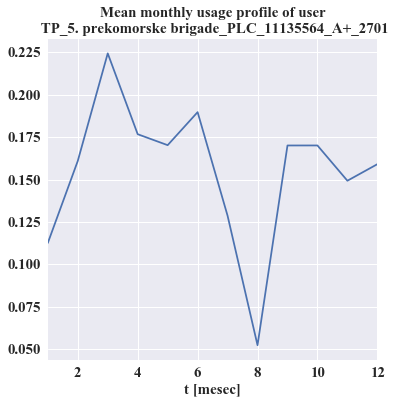

In [21]:
plt.figure(figsize = (cm_to_inch(15), cm_to_inch(15)))
plt.title('Mean monthly usage profile of user\n {}'.format(USER), fontsize=15)
monthly_user_profiles[USER].plot()
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.xlabel('t [mesec]', fontsize = 15)

In [22]:
monthly_user_profiles.to_excel('monthly_user_profiles.xlsx')